<a href="https://colab.research.google.com/github/sndpwrites/Kaggle-competition/blob/main/Titanic%20-%20Machine%20Learning%20from%20Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"","key":""}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import zipfile

with zipfile.ZipFile('titanic.zip') as z:
    # List all files in the archive
    print(z.namelist())
    # Assuming 'train.csv' is in the archive
    with z.open('train.csv') as f:
        df = pd.read_csv(f)

['gender_submission.csv', 'test.csv', 'train.csv']


In [ ]:
df.head()
df.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)

In [ ]:
categorical_features = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

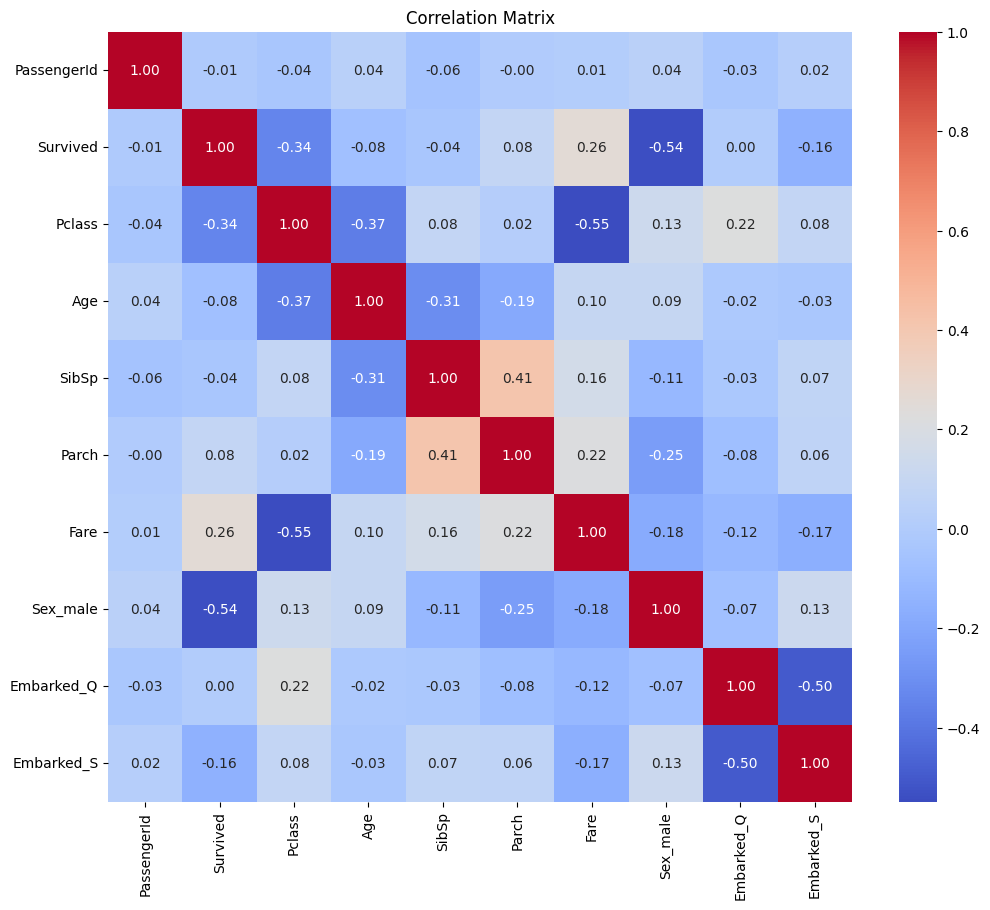

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
y = df['Survived']
X = df.drop(columns=['Survived'])

In [ ]:
print(y.value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
df.fillna(df.mean(), inplace=True)

In [ ]:
lr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
with zipfile.ZipFile('titanic.zip') as z:
    # List all files in the archive
    print(z.namelist())
    # Assuming 'train.csv' is in the archive
    with z.open('test.csv') as f:
        df_test = pd.read_csv(f)

['gender_submission.csv', 'test.csv', 'train.csv']


In [ ]:
categorical_features = ['Sex', 'Embarked']
df_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)

In [ ]:
df_test.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df_test.fillna(df_test.mean(), inplace=True)
y_pred = lr.predict(df_test)

In [ ]:
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
output.to_csv('prediction.csv', index=False)